- Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Wrangle Data

In [3]:
import wrangle

from wrangle import wrangle_sa_temp

In [4]:
df = wrangle_sa_temp()

In [5]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,month,year
dt,,,,
1823-01-01,9.425,2.788,1,1823
1823-02-01,9.864,3.157,2,1823
1823-03-01,16.228,2.660,3,1823
1823-04-01,20.097,3.091,4,1823
1823-05-01,23.811,2.044,5,1823


In [6]:
df.shape

(2289, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2289 entries, 1823-01-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             2289 non-null   float64
 1   AverageTemperatureUncertainty  2289 non-null   float64
 2   month                          2289 non-null   int64  
 3   year                           2289 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 89.4 KB


In [8]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty,month,year
count,2289.000000,2289.000000,2289.000000,2289.000000
mean,19.970752,0.795954,6.494102,1917.875491
std,6.872652,0.798271,3.451093,55.076907
min,4.023000,0.061000,1.000000,1823.000000
25%,13.737000,0.261000,3.000000,1870.000000
50%,20.292000,0.391000,6.000000,1918.000000
75%,26.686000,1.193000,9.000000,1966.000000
max,32.166000,5.063000,12.000000,2013.000000


# Data Splitting 

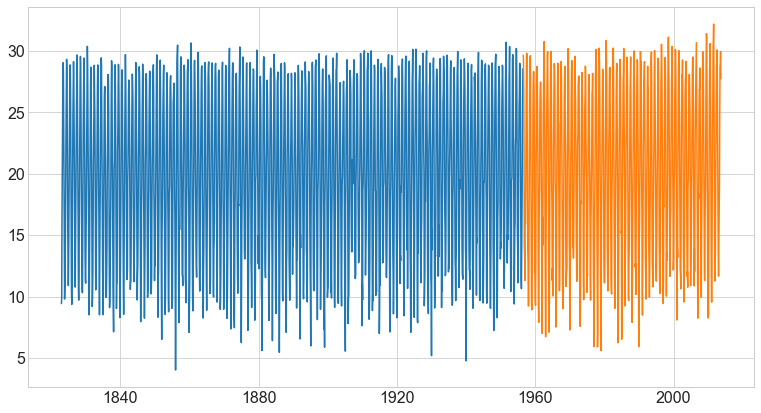

In [9]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.AverageTemperature)
plt.plot(test.index, test.AverageTemperature)

# Visualizations

In [10]:
y = train.AverageTemperature
y.head()

dt
1823-01-01     9.425
1823-02-01     9.864
1823-03-01    16.228
1823-04-01    20.097
1823-05-01    23.811
Name: AverageTemperature, dtype: float64

<AxesSubplot:ylabel='Frequency'>

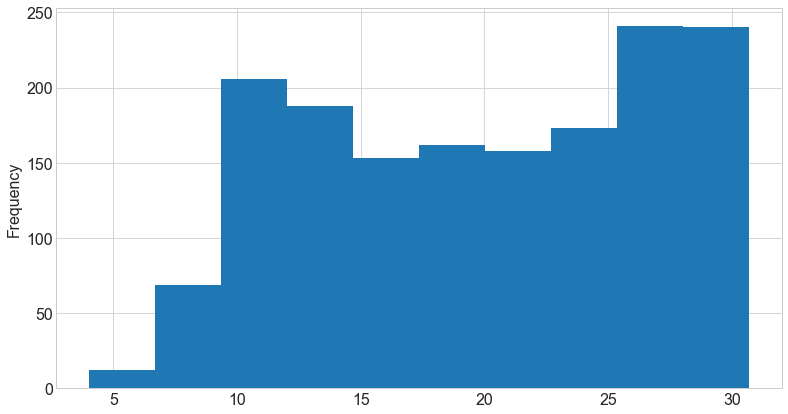

In [11]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (C)')]

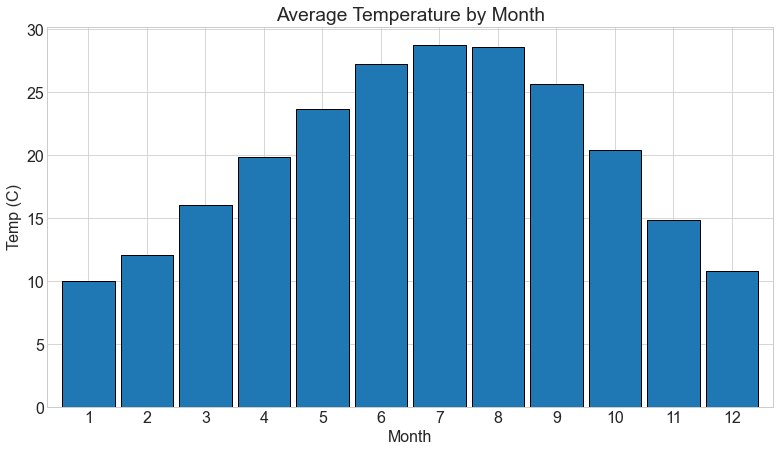

In [12]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (C)')

## Takeaways

- Target variable is skewed to the left

- Most observations are on the higher end of the spectrum

- hottest months are summer months and coldest are winter months 



## Visualize the target over time

<AxesSubplot:xlabel='dt'>

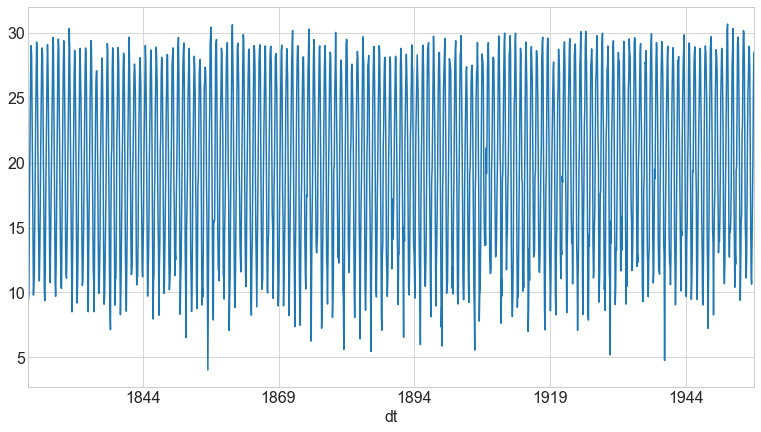

In [13]:
y.plot()

<AxesSubplot:title={'center':'2 month average'}, xlabel='dt'>

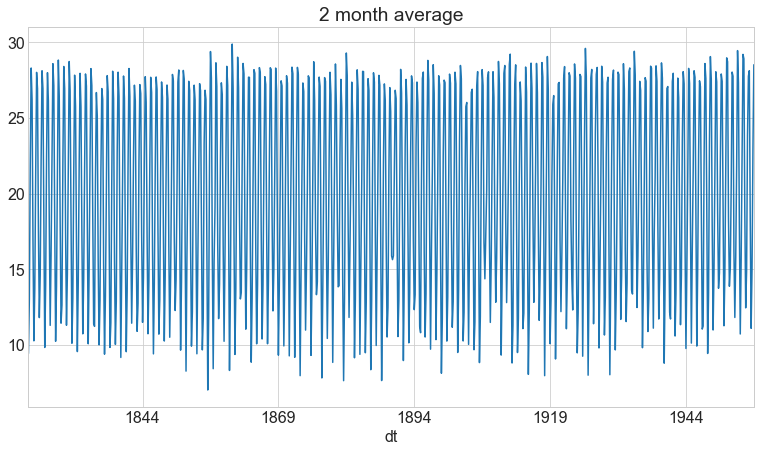

In [14]:
y.resample('2M').mean().plot(title='2 month average')

<AxesSubplot:title={'center':'4 month average'}, xlabel='dt'>

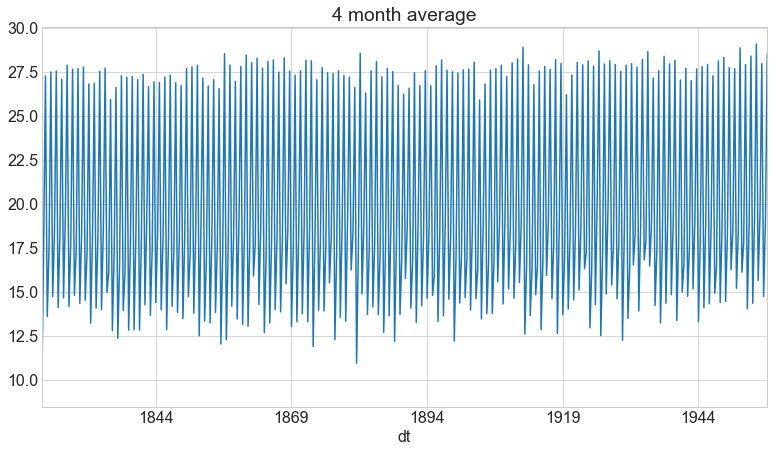

In [15]:
y.resample('4M').mean().plot(title='4 month average')

<AxesSubplot:title={'center':'Yearly average'}, xlabel='dt'>

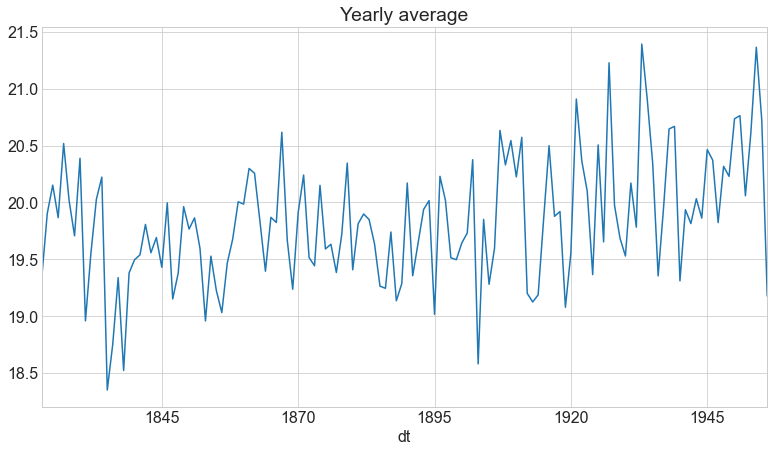

In [16]:
y.resample('Y').mean().plot(title='Yearly average')

<AxesSubplot:title={'center':' 5 Year average'}, xlabel='dt'>

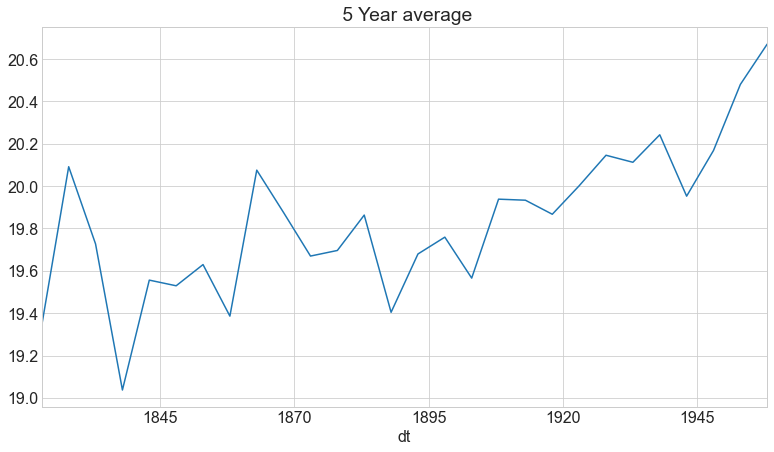

In [17]:
y.resample('5Y').mean().plot(title=' 5 Year average')

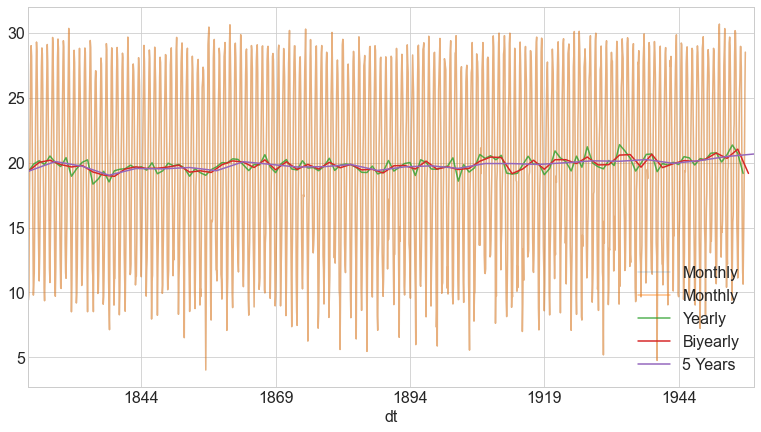

In [18]:
y.plot(alpha=.2, label='Monthly')
y.resample('M').mean().plot(alpha=.5, label='Monthly')
y.resample('Y').mean().plot(alpha=.8, label='Yearly')
y.resample('2Y').mean().plot(label='Biyearly')
y.resample('5Y').mean().plot(label='5 Years')
plt.legend()

### Takeaways

- The average temperature appears to be rising, but only gradually

## Visualize change over time

<AxesSubplot:title={'center':'Average year-to-year change in temperature'}, xlabel='dt'>

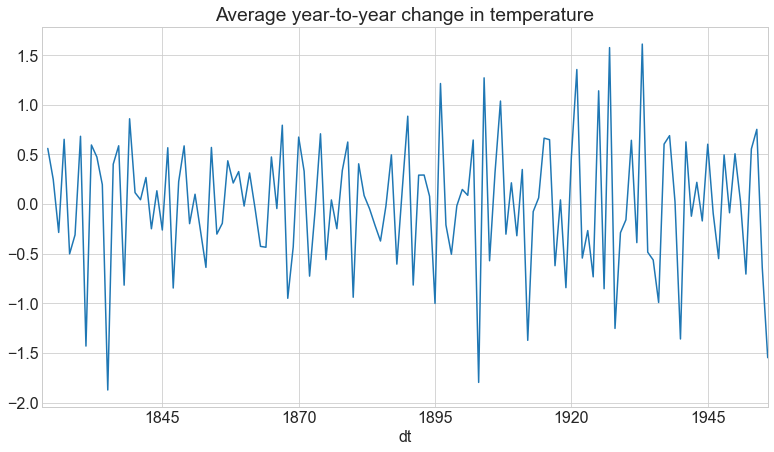

In [19]:
y.resample('Y').mean().diff().plot(title='Average year-to-year change in temperature')

<AxesSubplot:title={'center':'Average 2 year-to-year change in temperature'}, xlabel='dt'>

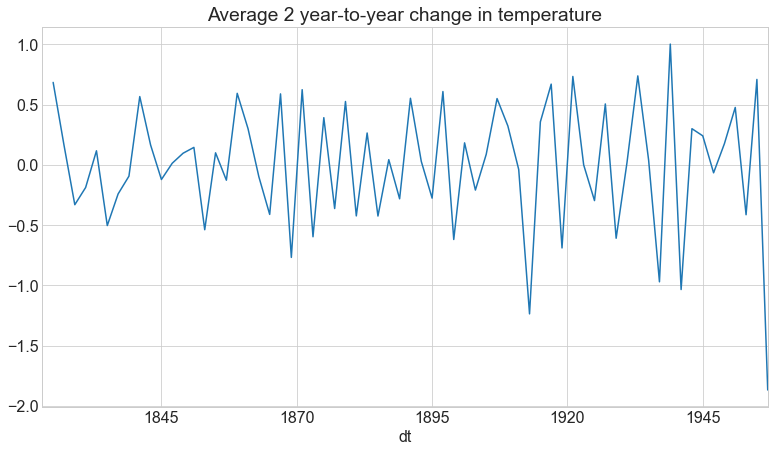

In [20]:
y.resample('2Y').mean().diff().plot(title='Average 2 year-to-year change in temperature')

<AxesSubplot:title={'center':'Average 5 year-to-year change in temperature'}, xlabel='dt'>

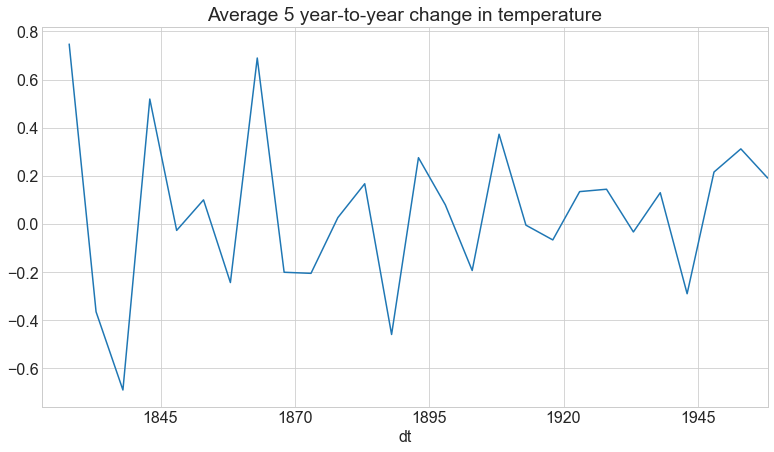

In [21]:
y.resample('5Y').mean().diff().plot(title='Average 5 year-to-year change in temperature')

<AxesSubplot:title={'center':'Average decade-to-decade change in temperature'}, xlabel='dt'>

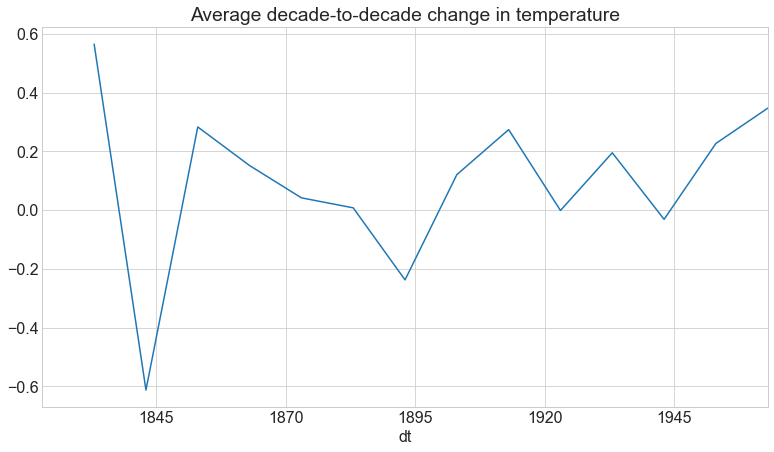

In [22]:
y.resample('10Y').mean().diff().plot(title='Average decade-to-decade change in temperature')

### Takeaways

- something occured in mid 1800's that caused the average temperature to dip

- otherwise average change appears to be stable 

## Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

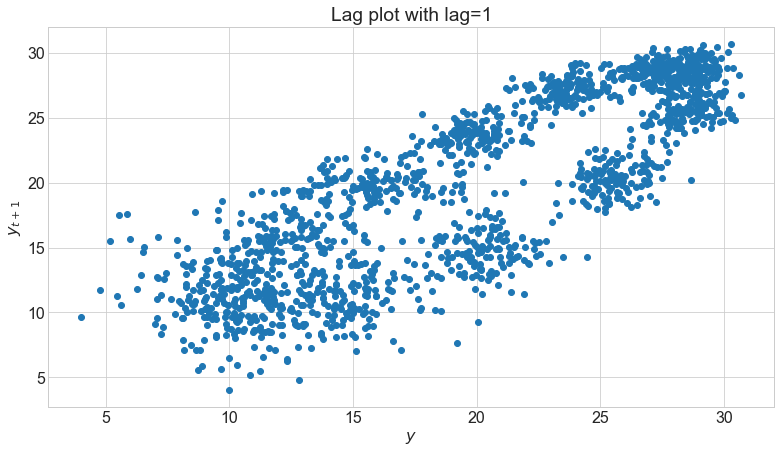

In [23]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

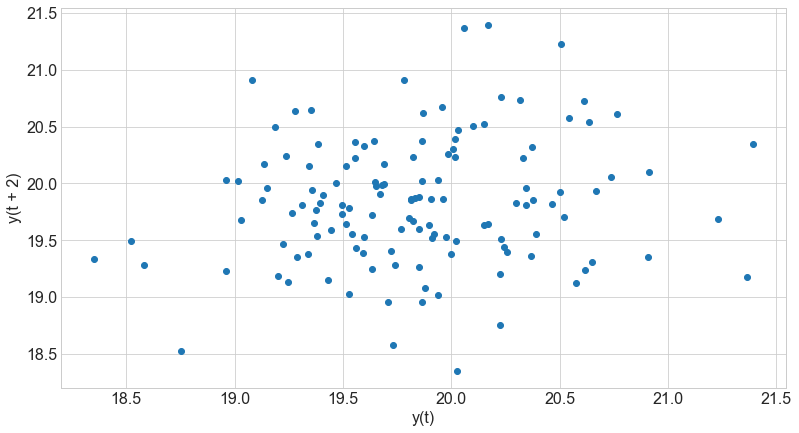

In [24]:
pd.plotting.lag_plot(train.AverageTemperature.resample('Y').mean(), lag=2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

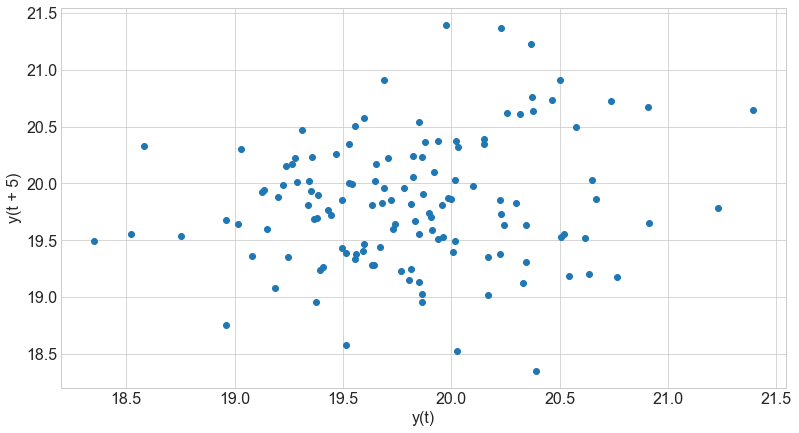

In [25]:
pd.plotting.lag_plot(train.AverageTemperature.resample('Y').mean(), lag=5)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 10)'>

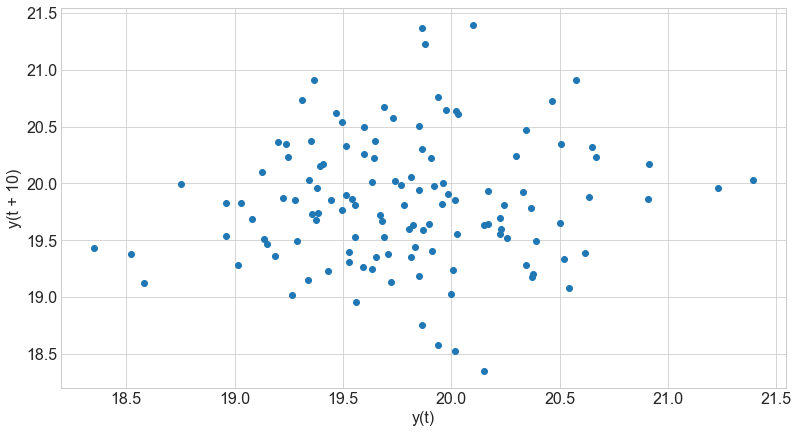

In [26]:
pd.plotting.lag_plot(train.AverageTemperature.resample('Y').mean(), lag=10)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 25)'>

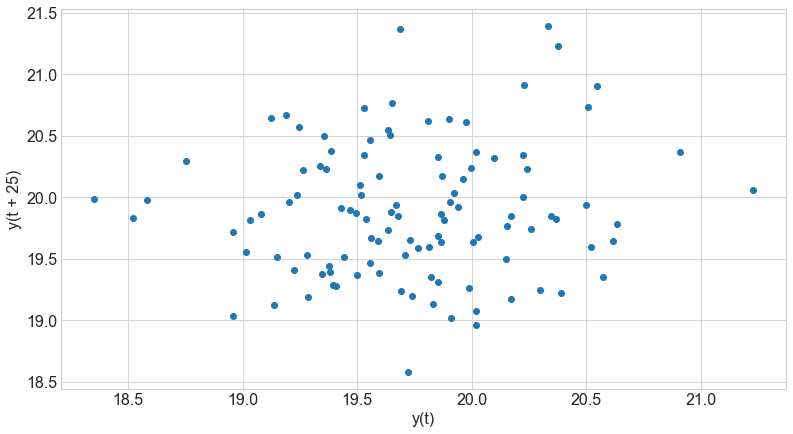

In [27]:
pd.plotting.lag_plot(train.AverageTemperature.resample('Y').mean(), lag=25)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 20)'>

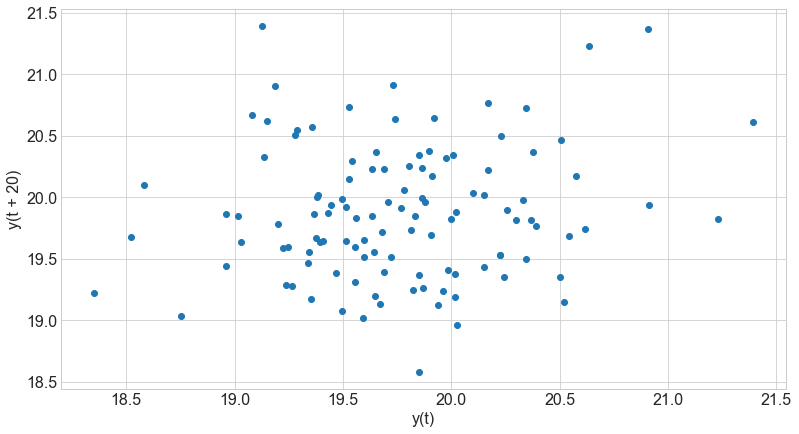

In [28]:
pd.plotting.lag_plot(train.AverageTemperature.resample('Y').mean(), lag=20)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 15)'>

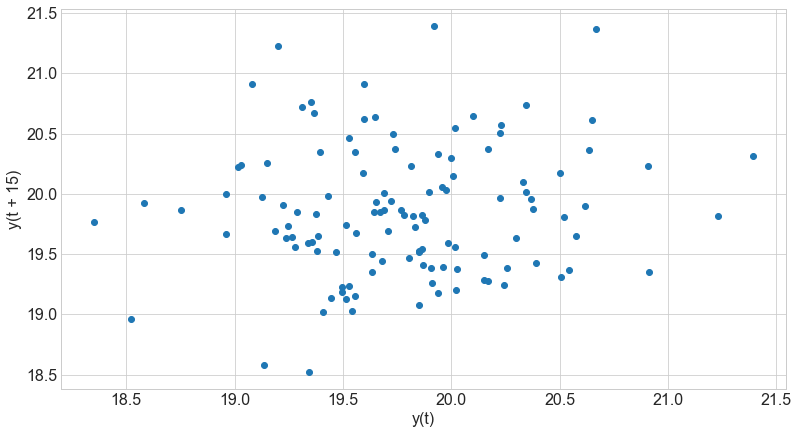

In [29]:
pd.plotting.lag_plot(train.AverageTemperature.resample('Y').mean(), lag=15)

#### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

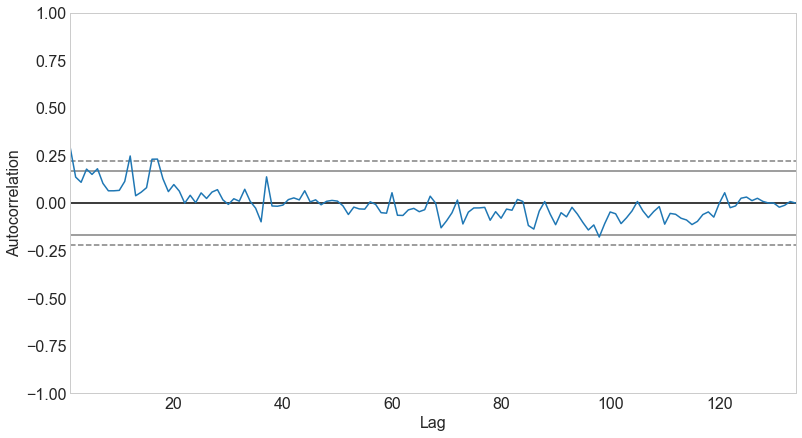

In [30]:
pd.plotting.autocorrelation_plot(train.AverageTemperature.resample('Y').mean())

#### Takeaways

- there is a linear correlation between the average temperature of this year and next year

- after which there does not appear to be a very strong correlation 

## Seasonal Decomposition

In [31]:
y = train.AverageTemperature.resample('Y').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
dt,,,,
1823-12-31,19.344333,19.344333,0.0,0.0
1824-12-31,19.904417,19.904417,0.0,0.0
1825-12-31,20.152500,20.152500,0.0,0.0
1826-12-31,19.866583,19.866583,0.0,0.0
1827-12-31,20.518583,20.518583,0.0,0.0


<AxesSubplot:xlabel='dt'>

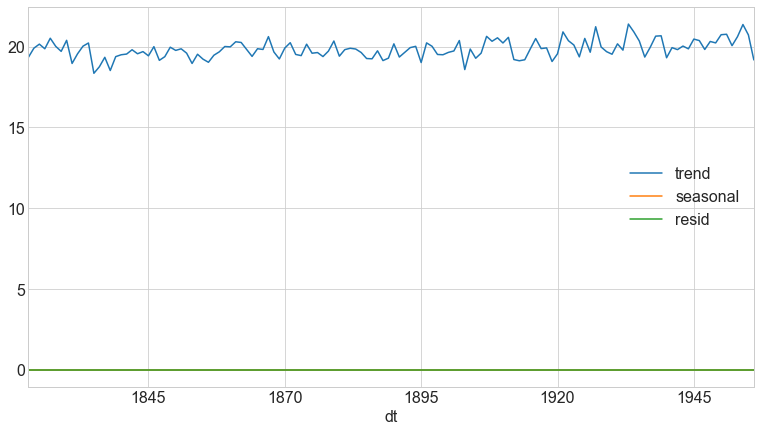

In [32]:
decomposition.iloc[:, 1:].plot()

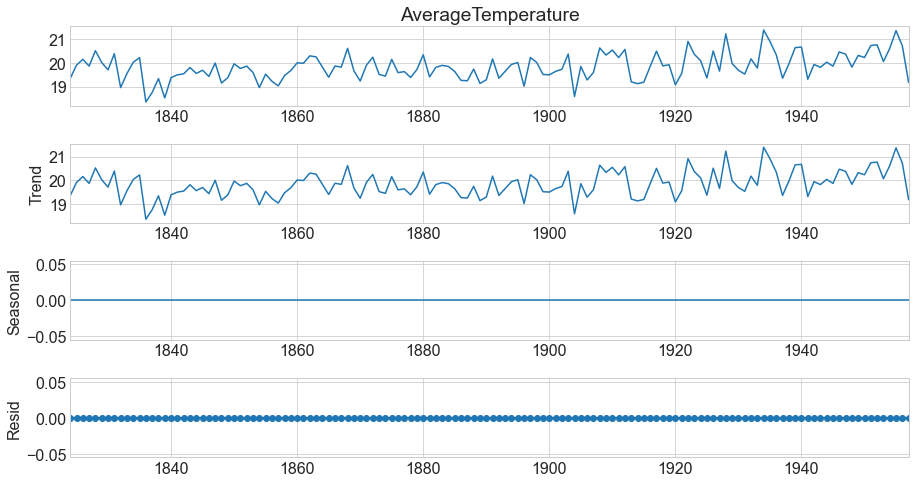

In [33]:
result.plot()
None

In [34]:
y = train.AverageTemperature.resample('10Y').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
dt,,,,
1823-12-31,19.344333,19.344333,0.0,0.0
1833-12-31,19.909367,19.909367,0.0,0.0
1843-12-31,19.296550,19.296550,0.0,0.0
1853-12-31,19.579400,19.579400,0.0,0.0
1863-12-31,19.730817,19.730817,0.0,0.0


<AxesSubplot:xlabel='dt'>

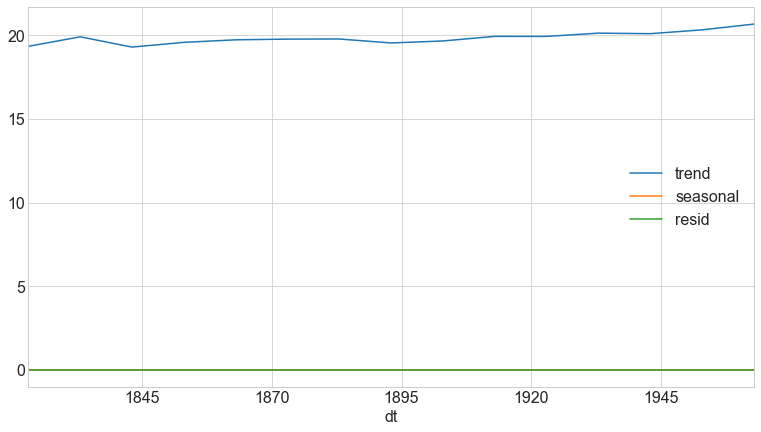

In [35]:
decomposition.iloc[:, 1:].plot()

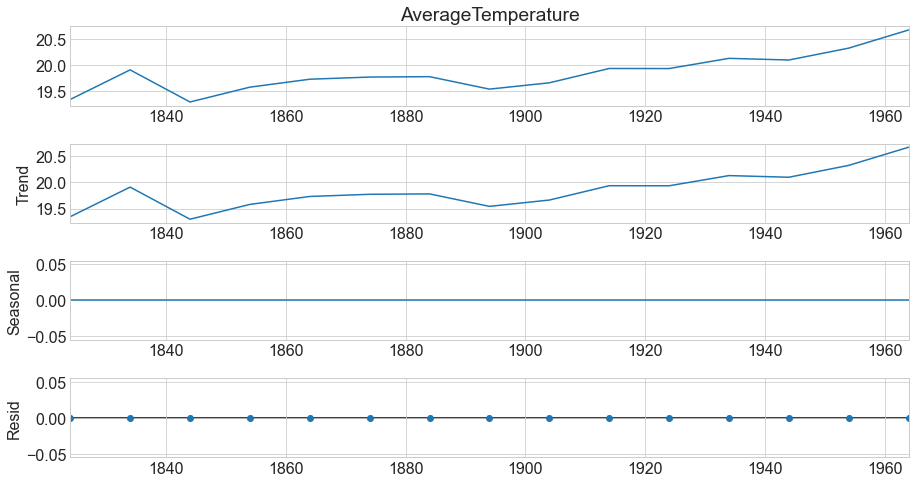

In [36]:
result.plot()
None

## Categories over time

In [40]:
train = train.resample('10Y').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.AverageTemperature, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()

,AverageTemperature,AverageTemperatureUncertainty,month,year
temp_bin,,,,
cold,19.440529,1.818919,6.50,1849.625000
cool,19.736300,1.101800,6.50,1876.000000
warm,19.926614,1.069156,6.50,1885.166667
hot,20.243351,0.282933,6.25,1942.625000


Text(0, 0.5, '% of Months in the Year')

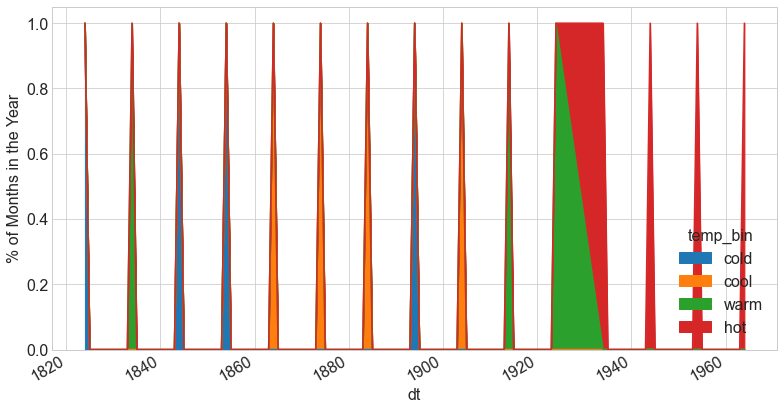

In [41]:
(train.groupby('temp_bin')
 .resample('Y')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of Months in the Year')

[Text(0, 0, 'December'),
 Text(1, 0, 'December'),
 Text(2, 0, 'December'),
 Text(3, 0, 'December'),
 Text(4, 0, 'December'),
 Text(5, 0, 'December'),
 Text(6, 0, 'December'),
 Text(7, 0, 'December'),
 Text(8, 0, 'December'),
 Text(9, 0, 'December'),
 Text(10, 0, 'December'),
 Text(11, 0, 'December'),
 Text(12, 0, 'December'),
 Text(13, 0, 'December'),
 Text(14, 0, 'December'),
 Text(15, 0, 'December'),
 Text(16, 0, 'December'),
 Text(17, 0, 'December'),
 Text(18, 0, 'December'),
 Text(19, 0, 'December'),
 Text(20, 0, 'December'),
 Text(21, 0, 'December'),
 Text(22, 0, 'December'),
 Text(23, 0, 'December'),
 Text(24, 0, 'December'),
 Text(25, 0, 'December'),
 Text(26, 0, 'December'),
 Text(27, 0, 'December'),
 Text(28, 0, 'December'),
 Text(29, 0, 'December'),
 Text(30, 0, 'December'),
 Text(31, 0, 'December'),
 Text(32, 0, 'December'),
 Text(33, 0, 'December'),
 Text(34, 0, 'December'),
 Text(35, 0, 'December'),
 Text(36, 0, 'December'),
 Text(37, 0, 'December'),
 Text(38, 0, 'December

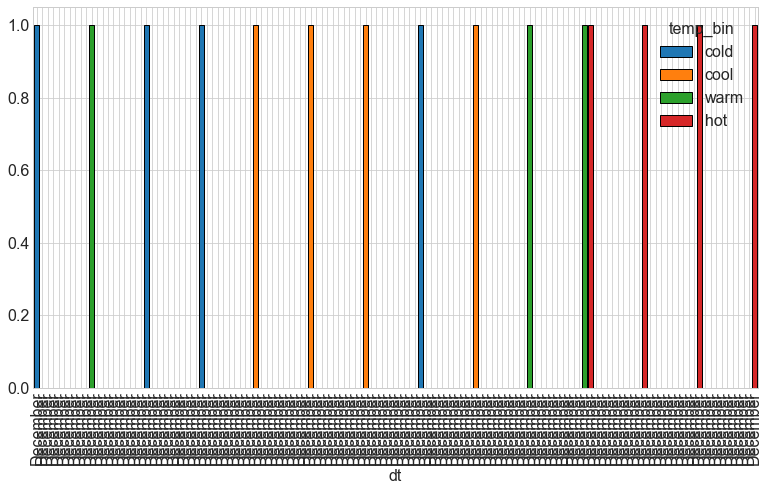

In [42]:
ax = (train
 .groupby('temp_bin')
 .resample('Y')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

## Takeaways

- More years and decades in the 'hot' bin recently